# Jonathan Halverson
# Wednesday, June 21, 2017
# Chapter 2 of Bruce & Bruce

Use x_bar for sample mean and mu for population mean.

It is very likely to find patterns in a large data set because they will occur by chance. It is important to specify your hypotheses before examining the data for this reason.

Regression to the mean is the phenomenon where a process at an extreme value is likely to yield a less extreme value at the next evaluation. An example is the rookie of the year phenomenon where all rookies in a given sport are of approximately equal skill level and by chance one of them is elevated above the others. The next season luck is not on their side and the sophomore slump is observed.

Stratified sampling is when the population is divided into strata and random samples are taken within each stratum.

A sample statistic is a metric calculated from a sample of the population. In inferential statistics we are interested in the sampling distribution of the metric. The standard deviation of the sampling distribution is equal to the stardard error.

### Demonstration of the bootstrap

In [16]:
import numpy as np
from numpy.random import lognormal
from numpy.random import choice

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Generate a population drawn from the lognormal distribution:

In [14]:
population = lognormal(mean=1.0, sigma=0.5, size=10000)
population.mean(), population.std()

(3.0886082742344465, 1.6484613642522972)

(array([  3.51000000e+02,   1.55300000e+03,   2.16200000e+03,
          1.87200000e+03,   1.36200000e+03,   9.70000000e+02,
          6.30000000e+02,   3.83000000e+02,   2.44000000e+02,
          1.56000000e+02,   1.05000000e+02,   7.40000000e+01,
          5.10000000e+01,   2.80000000e+01,   1.40000000e+01,
          1.70000000e+01,   8.00000000e+00,   9.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  0.4469207 ,   1.09864774,   1.75037478,   2.40210182,
          3.05382886,   3.7055559 ,   4.35728294,   5.00900999,
          5.66073703,   6.31246407,   6.96419111,   7.61591815,
          8.26764519,   8.91937223,   9.57109927,  10.22282631,
         10.87455336,  11.5262804 ,  12.17800744,  12.82973448,
         13.48146152,  14.13318856,  14.7849156 ,  15.43664264,
         16.08836968,  16.74009673]),
 <a list of 25 Patch objects>)

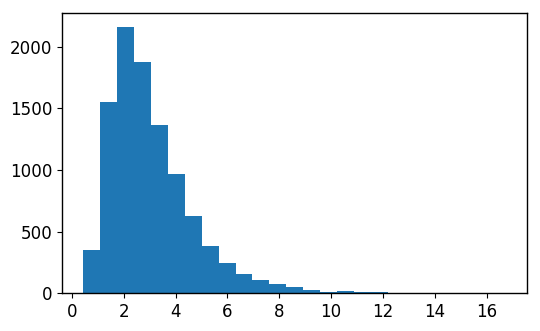

In [7]:
plt.hist(population, bins=25)

Create a sample drawn from the population:

In [11]:
sample = choice(population, size=25, replace=False)
sample.mean(), sample.std()

(2.8614780650924541, 1.6636156201568315)

Create a sampling distribution by drawing multiple samples, computing the mean of each and then constructing a histogram:

In [12]:
sample_statistics = []
for _ in range(1000):
     sample_statistics.append(choice(population, size=25, replace=False).mean())

(array([  17.,   95.,  222.,  282.,  236.,   96.,   38.,   12.,    1.,    1.]),
 array([ 2.22842066,  2.46549627,  2.70257188,  2.93964749,  3.1767231 ,
         3.41379871,  3.65087432,  3.88794993,  4.12502554,  4.36210115,
         4.59917676]),
 <a list of 10 Patch objects>)

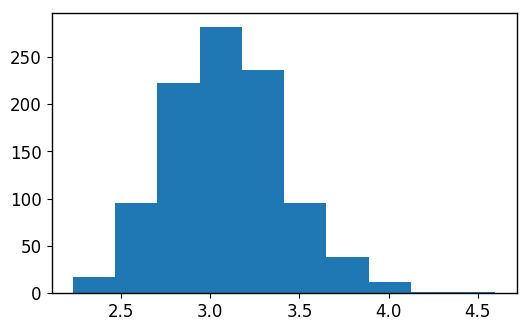

In [13]:
plt.hist(sample_statistics)

The standard deviation of the sampling distribution is the standard error:

In [17]:
np.array(sample_statistics).mean(), np.array(sample_statistics).std()

(3.0910093715348066, 0.32752491195812133)

The standard deviation of the population is reconstructed by multiplly the standard deviation of the sampling distribution by the square root of the sample size:

In [18]:
np.array(sample_statistics).std() * 25**0.5

1.6376245597906067

In [19]:
np.array(sample_statistics).std()

0.32752491195812133

The standard error based on the single sample is:

In [20]:
sample.std() / 25**0.5

0.33272312403136628

Note that the above result agrees closely with the standard deviation of the sampling distriubtion.

Generate bootstrap samples and compute the mean of each:

In [21]:
bstraps = []
for _ in range(1000):
     bstraps.append(choice(sample, size=25, replace=True).mean())

(array([  23.,   93.,  183.,  279.,  213.,  128.,   54.,   16.,    8.,    3.]),
 array([ 2.05322537,  2.2628375 ,  2.47244963,  2.68206176,  2.89167389,
         3.10128602,  3.31089815,  3.52051028,  3.73012241,  3.93973454,
         4.14934667]),
 <a list of 10 Patch objects>)

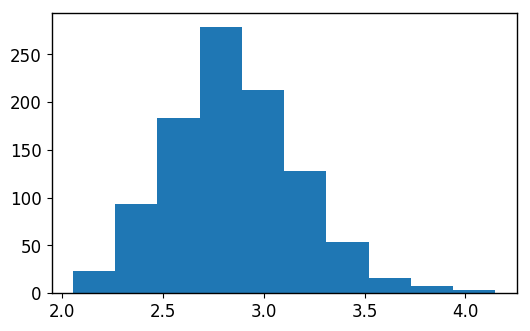

In [22]:
plt.hist(bstraps)

The standard deviation of the bootstrapped sampling distribution is the standard error that we seek:

In [24]:
np.array(bstraps).std()

0.3244762101942395

### What is the 90% confidence interval of the sample mean according to bootstrapping?

In [29]:
np.array(bstraps).mean()

2.8501547660013604

In [34]:
for i, val in enumerate(sorted(bstraps)):
     if i == 49 or i == 950: print i, val

49 2.33828786952
950 3.41351197865


In [35]:
np.percentile(bstraps, q=5), np.percentile(bstraps, q=95)

(2.3400748609132749, 3.4055842691949558)

The 90% confidence interval is [2.34, 3.41].

Using the equation based approach:

In [48]:
from scipy.stats import t
lo = sample.mean() + t.ppf(0.05, df=24) * sample.std() / 25**0.5
hi = sample.mean() - t.ppf(0.05, df=24) * sample.std() / 25**0.5
lo, hi

(2.2922280346157073, 3.4307280955692008)